**Data preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
data = pd.read_csv("dataset_phishing.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         3467 non-null   object 
 1   length_url                  3467 non-null   int64  
 2   length_hostname             3467 non-null   int64  
 3   ip                          3467 non-null   int64  
 4   nb_dots                     3467 non-null   int64  
 5   nb_hyphens                  3466 non-null   float64
 6   nb_at                       3466 non-null   float64
 7   nb_qm                       3466 non-null   float64
 8   nb_and                      3466 non-null   float64
 9   nb_or                       3466 non-null   float64
 10  nb_eq                       3466 non-null   float64
 11  nb_underscore               3466 non-null   float64
 12  nb_tilde                    3466 non-null   float64
 13  nb_percent                  3466 

In [ ]:
data['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [ ]:
data['length_url'].value_counts()

length_url
29     89
26     76
25     73
32     72
31     72
       ..
271     1
282     1
189     1
396     1
232     1
Name: count, Length: 229, dtype: int64

**Feature Analysis**

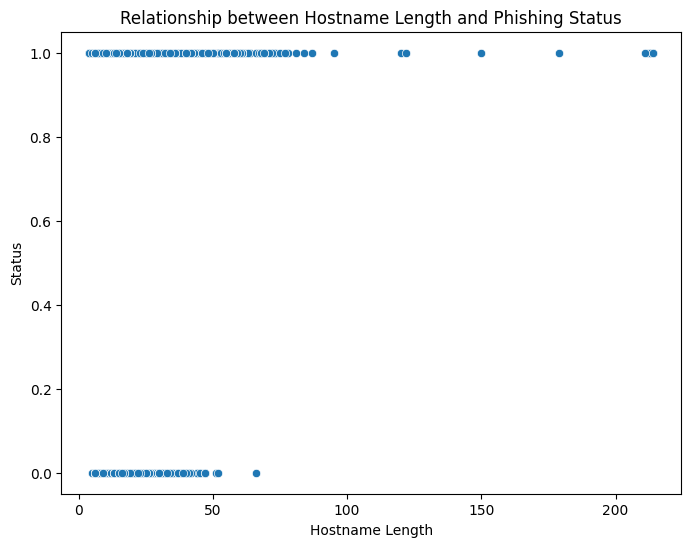

In [ ]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=data, x='length_hostname', y='status')
plt.title('Relationship between Hostname Length and Phishing Status')
plt.xlabel('Hostname Length')
plt.ylabel('Status')
plt.show()

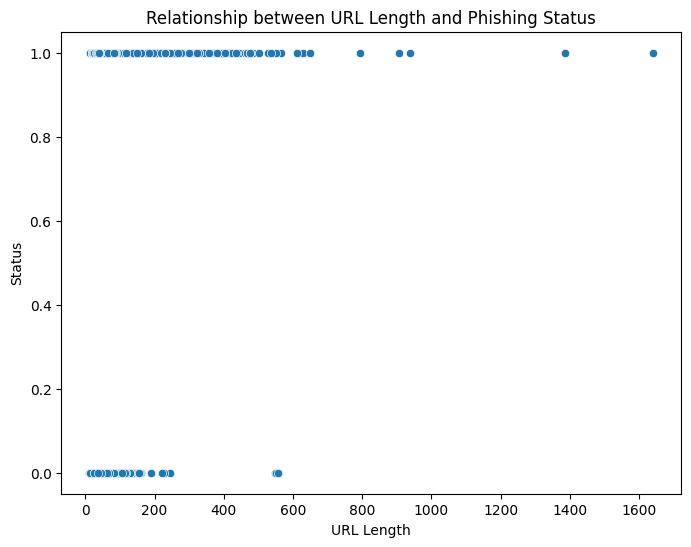

In [ ]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=data, x='length_url', y='status')
plt.title('Relationship between URL Length and Phishing Status')
plt.xlabel('URL Length')
plt.ylabel('Status')
plt.show()

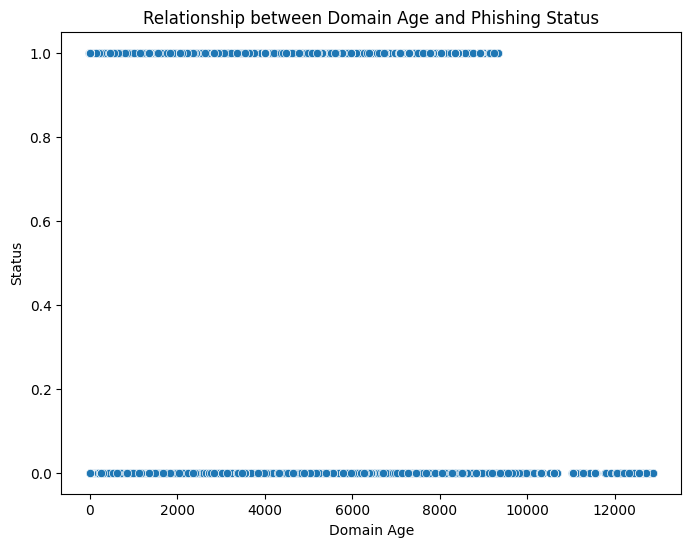

In [ ]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=data, x='domain_age', y='status')
plt.title('Relationship between Domain Age and Phishing Status')
plt.xlabel('Domain Age')
plt.ylabel('Status')
plt.show()

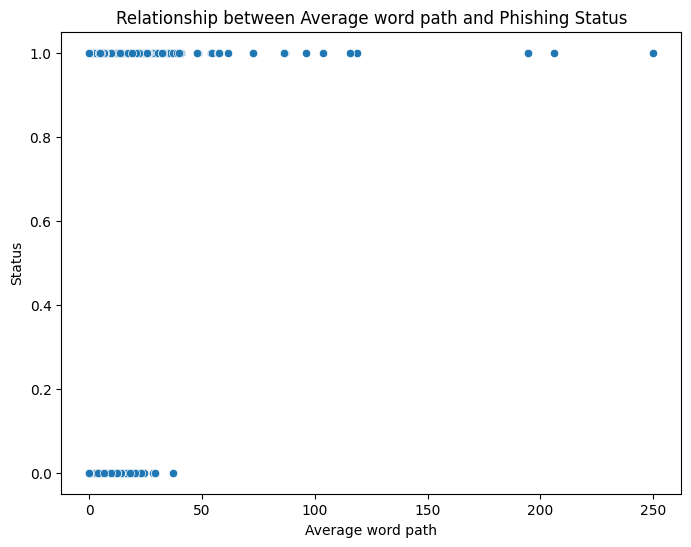

In [ ]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=data, x='avg_word_path', y='status')
plt.title('Relationship between Average word path and Phishing Status')
plt.xlabel('Average word path')
plt.ylabel('Status')
plt.show()

In [ ]:
data.describe()

In [ ]:
data = data.replace({'status':{'legitimate':0,'phishing':1}})

<Axes: >

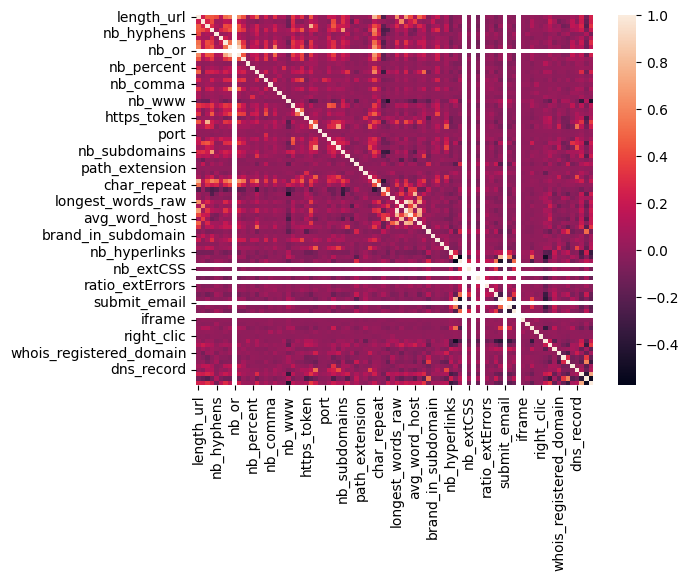

In [ ]:
matrix = data.corr()
sb.heatmap(matrix)

In [ ]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Training the random forest model to find the significant features**

In [ ]:
best_rf_model.fit(x_train,y_train)
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

for index, row in feature_importance_df.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")

Feature: nb_or, Importance: 0.0
Feature: ratio_intRedirection, Importance: 0.0
Feature: sfh, Importance: 0.0
Feature: submit_email, Importance: 0.0
Feature: nb_external_redirection, Importance: 0.0
Feature: ratio_nullHyperlinks, Importance: 0.0
Feature: ratio_intErrors, Importance: 0.0
Feature: punycode, Importance: 0.0
Feature: nb_dollar, Importance: 3.962216218163232e-06
Feature: nb_star, Importance: 4.005766506567325e-06
Feature: onmouseover, Importance: 4.784536063068281e-06
Feature: path_extension, Importance: 4.0362402638866236e-05
Feature: nb_comma, Importance: 4.070059954486545e-05
Feature: right_clic, Importance: 5.0952702187913964e-05
Feature: nb_tilde, Importance: 6.551270418657553e-05
Feature: brand_in_subdomain, Importance: 6.574479080401117e-05
Feature: popup_window, Importance: 0.00010310213827309617
Feature: iframe, Importance: 0.00012960420523776473
Feature: nb_dslash, Importance: 0.00022291024482929474
Feature: brand_in_path, Importance: 0.00024984864624093695
Feature

**Removing features with zero significance level**

In [ ]:
# Filter out features with 0 importance
nonzero_features_df = feature_importance_df[feature_importance_df['Importance'] > 0]

# If you want to get a list of column names to delete, you can do:
columns_to_delete = list(set(x.columns) - set(nonzero_features_df['Feature']))
print("Columns to delete:", columns_to_delete)

# If you want to drop the columns directly from the DataFrame X:
x = x.drop(columns=columns_to_delete)


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier
clf.fit(x_train, y_train)

# Extract feature importances
gini_importance = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Gini Importance': gini_importance
})

# Sort features by Gini Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Gini Importance', ascending=False).reset_index(drop=True)

# Print the top 10 important features
print("Top 10 important features:")
print(feature_importance_df.head(20))


Top 10 important features:
                       Feature  Gini Importance
0                 google_index         0.531358
1                    page_rank         0.100499
2                nb_hyperlinks         0.090006
3                   domain_age         0.028190
4                       nb_www         0.027717
5                  web_traffic         0.020977
6                        nb_qm         0.020022
7              length_hostname         0.012315
8             length_words_raw         0.010461
9            longest_word_path         0.009807
10                 phish_hints         0.009669
11  domain_registration_length         0.008463
12         ratio_extHyperlinks         0.008249
13                 safe_anchor         0.007949
14                  nb_hyphens         0.007540
15         ratio_intHyperlinks         0.007412
16               avg_word_host         0.007065
17                  length_url         0.005961
18               links_in_tags         0.005292
19        rat

**Random forest model**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Store the accuracies in a list
rf_scores = grid_search.cv_results_['mean_test_score']
print(rf_scores)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9667541557305337
[0.95899004 0.95888081 0.9587714  0.95888069 0.95855264 0.95942761
 0.95778719 0.9593185  0.95877146 0.95975548 0.95909951 0.95898998
 0.95920898 0.95909957 0.95877158 0.95909945 0.95756868 0.9581153
 0.95713122 0.95636553 0.95724045 0.95713122 0.95636553 0.95724045
 0.95734974 0.95702175 0.95756868 0.96358355 0.96336473 0.96391154
 0.96369266 0.96412994 0.96402071 0.96139596 0.96106821 0.96139632
 0.96336467 0.96259887 0.96259887 0.96172413 0.96216165 0.96248994
 0.9609588  0.96106803 0.96117744 0.96095863 0.95975566 0.95997454
 0.96095863 0.95975566 0.95997454 0.96008389 0.96008407 0.95920916
 0.96358331 0.96402083 0.96380219 0.96336473 0.96336461 0.96358319
 0.96139602 0.9616149  0.9613962  0.96380189 0.96248958 0.96248958
 0.96161472 0.96216183 0.96227112 0.96117756 0.96106803 0.96106809
 0.96084922 0.96008377 0.9599746  0.96084922 0.96008377 0.9599746

**KNN Model**

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Accuracy: 0.8709536307961505
Accuracy: [0.84273939 0.8543315  0.83453664 0.84459797 0.83705185 0.85739269
 0.82742815 0.8465662  0.8355212  0.86132992 0.82830312 0.85203421
 0.83060018 0.86111122 0.82042943 0.85312788 0.84273939 0.8543315
 0.83453664 0.84459797 0.83705185 0.85739269 0.82742815 0.8465662
 0.8355212  0.86132992 0.82830312 0.85203421 0.83060018 0.86111122
 0.82042943 0.85312788 0.84273939 0.8543315  0.83453664 0.84459797
 0.83705185 0.85739269 0.82742815 0.8465662  0.8355212  0.86132992
 0.82830312 0.85203421 0.83060018 0.86111122 0.82042943 0.85312788
 0.84273939 0.8543315  0.83453664 0.84459797 0.83705185 0.85739269
 0.82742815 0.8465662  0.8355212  0.86132992 0.82830312 0.85203421
 0.83060018 0.86111122 0.82042943 0.85312788]


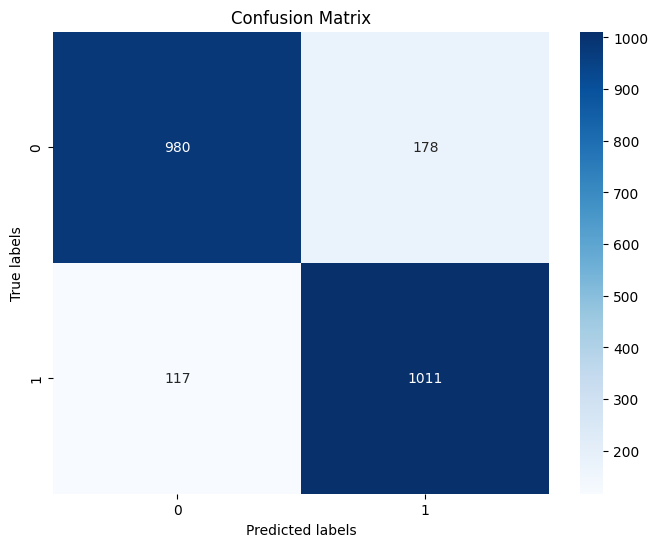


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1158
           1       0.85      0.90      0.87      1128

    accuracy                           0.87      2286
   macro avg       0.87      0.87      0.87      2286
weighted avg       0.87      0.87      0.87      2286



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors 'k'
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # L1 and L2 distances
}

# Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best estimator from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions
y_pred = best_knn_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Store the accuracies in a list
knn_scores = grid_search.cv_results_['mean_test_score']

# Evaluate model performance
print("Accuracy:", knn_scores)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))


**LDA Model**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

---------------------------------------------------------------------------

Best Parameters: {'n_components': 1, 'shrinkage': None, 'solver': 'svd'}
Accuracy: 0.926509186351706
[       nan 0.92804076 0.92836898 0.92880644 0.92771349        nan
        nan        nan        nan        nan        nan        nan
        nan 0.92804076 0.92836898 0.92880644 0.92771349        nan]


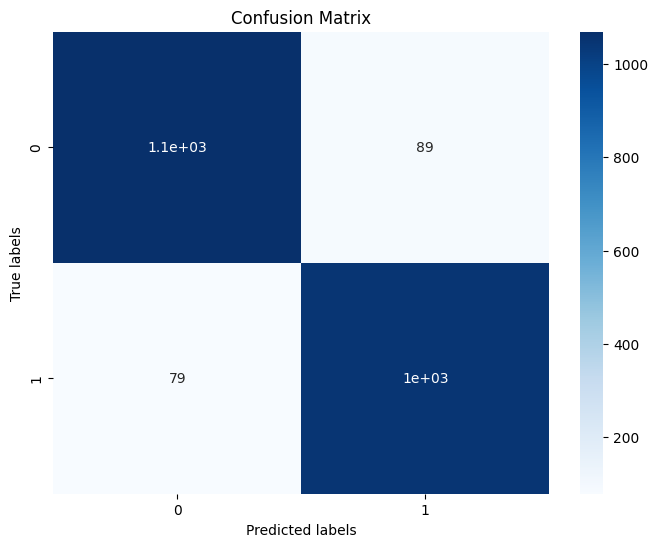


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1158
           1       0.92      0.93      0.93      1128

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver for shrinkage or regularization
    'shrinkage': ['auto', None],  # Method used to estimate the covariance matrix shrinkage
    'n_components': [1, 2, None]  # Number of components for dimensionality reduction
}

# Initialize the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lda_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best estimator from GridSearchCV
best_lda_model = grid_search.best_estimator_

# Make predictions
y_pred = best_lda_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Store the accuracies in an array
lda_scores = grid_search.cv_results_['mean_test_score']

print(lda_scores)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Model

Best Parameters: {'C': 1.0, 'max_iter': 3000, 'solver': 'liblinear', 'tol': 0.0001}
Accuracy: 0.8075240594925635
[0.80862083 0.72179408 0.53116864 0.53182485 0.51881162 0.48326841
 0.80632438 0.73568139 0.53116864 0.53182485 0.51881162 0.48326841
 0.81703912 0.73775807 0.53116864 0.53182485 0.51881162 0.48315906
 0.81234093 0.72255971 0.53116864 0.53182485 0.51881162 0.48337776
 0.81332124 0.7358992  0.53116864 0.53182485 0.51881162 0.48315906]


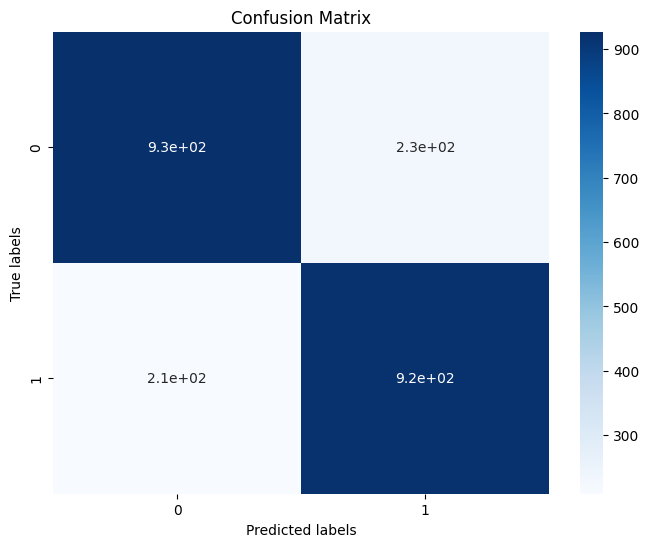


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1158
           1       0.80      0.81      0.81      1128

    accuracy                           0.81      2286
   macro avg       0.81      0.81      0.81      2286
weighted avg       0.81      0.81      0.81      2286



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
param_grid = {
    'C': [0.01, 0.1, 1.0, 1.2, 1.5],  # Inverse regularization strength
    'solver': ['liblinear', 'saga'],  # Solver for optimization
    'max_iter': [3000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criteria
}

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best estimator from GridSearchCV
best_lr_model = grid_search.best_estimator_

# Make predictions
y_pred = best_lr_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Store the accuracies in an array
lr_scores = grid_search.cv_results_['mean_test_score']
print(lr_scores)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))


**Decision Tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best estimator from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred = best_dt_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Store the accuracies in an array
dt_scores = grid_search.cv_results_['mean_test_score']

print(dt_scores)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.937007874015748
[0.94007068 0.93700878 0.93810245 0.93952364 0.9386489  0.93952411
 0.93383753 0.93252564 0.93219747 0.93296249 0.9343841  0.93482173
 0.93788364 0.93329114 0.93405605 0.93230652 0.93329066 0.93318089
 0.93591349 0.93197656 0.93230484 0.93285153 0.93711687 0.93591361
 0.93099271 0.93011714 0.92902442 0.92705565 0.93164875 0.93143023
 0.92891435 0.92836755 0.92902436 0.92804004 0.93110194 0.93121105]
Accuracy: 0.937007874015748

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1158
           1       0.94      0.94      0.94      1128

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286


Confusion Matrix:
 [[1086   72]
 [  72 1056]]


**SVC Model**

Accuracy: 0.9518810148731408

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1158
           1       0.96      0.94      0.95      1128

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286


Confusion Matrix:
 [[1112   46]
 [  64 1064]]


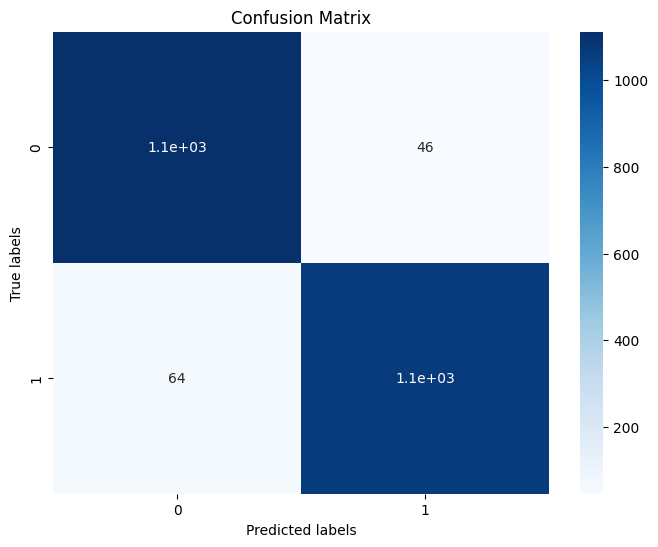


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1158
           1       0.96      0.94      0.95      1128

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


# Initialize the Support Vector Machine Classifier
svm_classifier = SVC()  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the Support Vector Machine Classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test_scaled)


# Evaluate model performance
svm_scores = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_scores)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


**Training the model after removal of outliers**

In [ ]:
data2 = data[((data['length_url']<=550)&(data['status']=='legitimate'))|(data['status']=='phishing')]
print(data2['status'].value_counts())


status
phishing      5715
legitimate    5712
Name: count, dtype: int64


In [ ]:
data_filtered = data[((data['length_url'] <= 550) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
rf_model_2 = RandomForestClassifier(n_estimators=200,random_state=42,max_depth=20,min_samples_split=5,min_samples_leaf=1)
# Train the Random Forest model
rf_model_2.fit(x_train, y_train)
# Make predictions
y_pred = rf_model_2.predict(x_test)

x_thres = np.array(x_test['length_url'])

threshold = 550

x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.9650043744531933


In [ ]:
data_filtered = data[((data['length_hostname'] <= 55) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
rf_model_2 = RandomForestClassifier(n_estimators=200,random_state=40,max_depth=20,min_samples_split=5,min_samples_leaf=1)
# Train the Random Forest model
rf_model_2.fit(x_train, y_train)
# Make predictions
y_pred = rf_model_2.predict(x_test)

x_thres = np.array(x_test['length_hostname'])

threshold = 55

x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.9566929133858267


In [ ]:
data_filtered = data[((data['avg_word_path'] <= 40) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
rf_model_2 = RandomForestClassifier(n_estimators=200,random_state=40,max_depth=20,min_samples_split=5,min_samples_leaf=1)
# Train the Random Forest model
rf_model_2.fit(x_train, y_train)
# Make predictions
y_pred = rf_model_2.predict(x_test)

x_thres = np.array(x_test['avg_word_path'])

threshold = 40

x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.9654418197725284


In [ ]:
rf_scores = [0.95899004, 0.95888081, 0.9587714, 0.95888069, 0.95855264, 0.95942761, 0.95778719, 0.9593185, 0.95877146, 0.95975548, 0.95909951, 0.95898998, 0.95920898, 0.95909957, 0.95877158, 0.95909945, 0.95756868, 0.9581153, 0.95713122, 0.95636553, 0.95724045, 0.95713122, 0.95636553, 0.95724045, 0.95734974, 0.95702175, 0.95756868, 0.96358355, 0.96336473, 0.96391154, 0.96369266, 0.96412994, 0.96402071, 0.96139596, 0.96106821, 0.96139632, 0.96336467, 0.96259887, 0.96259887, 0.96172413, 0.96216165, 0.96248994, 0.9609588, 0.96106803, 0.96117744, 0.96095863, 0.95975566, 0.95997454, 0.96095863, 0.95975566, 0.95997454, 0.96008389, 0.96008407, 0.95920916, 0.96358331, 0.96402083, 0.96380219, 0.96336473, 0.96336461, 0.96358319, 0.96139602, 0.9616149, 0.9613962, 0.96380189, 0.96248958, 0.96248958, 0.96161472, 0.96216183, 0.96227112, 0.96117756, 0.96106803, 0.96106809, 0.96084922, 0.96008377, 0.9599746, 0.96084922, 0.96008377, 0.9599746, 0.96019324, 0.9597559, 0.95909987]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

data_filtered = data[((data['length_url'] <= 550) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

knn_model_2 = KNeighborsClassifier(n_neighbors=7,weights="distance",algorithm="auto",p=1)
# Train the Random Forest model
knn_model_2.fit(x_train, y_train)
# Make predictions
y_pred = knn_model_2.predict(x_test)

x_thres = np.array(x_test['length_url'])
threshold = 550
x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.8718285214348207


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

data_filtered = data[((data['length_hostname'] <= 50) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

knn_model_2 = KNeighborsClassifier(n_neighbors=7,weights="distance",algorithm="auto",p=1)
# Train the Random Forest model
knn_model_2.fit(x_train, y_train)
# Make predictions
y_pred = knn_model_2.predict(x_test)

x_thres = np.array(x_test['length_url'])
threshold = 50
x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.5061242344706912


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data_filtered = data[((data['length_url'] <= 550) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

svc_model_2 = SVC()
# Train the Random Forest model
svc_model_2.fit(x_train, y_train)
# Make predictions
y_pred = svc_model_2.predict(x_test)

x_thres = np.array(x_test['length_url'])
threshold = 550
x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.5914260717410323


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data_filtered = data[((data['length_url'] <= 500) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

ld_model_2 = LinearDiscriminantAnalysis()
# Train the Random Forest model
ld_model_2.fit(x_train, y_train)
# Make predictions
y_pred = ld_model_2.predict(x_test)

x_thres = np.array(x_test['length_url'])
threshold = 500
x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.9251968503937008


In [ ]:
from sklearn.linear_model import LogisticRegression

data_filtered = data[((data['length_url'] <= 550) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

lr_model_2 = LogisticRegression(C = 1.0, max_iter = 3000, solver = 'liblinear', tol = 0.0001)
# Train the Random Forest model
lr_model_2.fit(x_train, y_train)
# Make predictions
y_pred = lr_model_2.predict(x_test)

x_thres = np.array(x_test['length_url'])
threshold = 550
x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.8066491688538933


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data_filtered = data[((data['avg_word_path'] <= 50) & (data['status']=='legitimate'))|(data['status']=='phishing')]
data = data.replace({'status':{'legitimate':0,'phishing':1}})

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

ld_model_2 = LinearDiscriminantAnalysis()
# Train the Random Forest model
ld_model_2.fit(x_train, y_train)
# Make predictions
y_pred = ld_model_2.predict(x_test)

x_thres = np.array(x_test['avg_word_path'])
threshold = 50
x_threshold = (x_thres > threshold).astype(int)

y_pred_thres = np.array(y_pred)

y_pred_corrected = np.where(x_threshold == 1, 1 - y_pred, y_pred)

print(accuracy_score(y_test,y_pred_corrected))

0.9247594050743657


In [ ]:
knn_scores = [0.84273939, 0.8543315, 0.83453664, 0.84459797, 0.83705185, 0.85739269, 0.82742815, 0.8465662, 0.8355212, 0.86132992, 0.82830312, 0.85203421, 0.83060018, 0.86111122, 0.82042943, 0.85312788, 0.84273939, 0.8543315, 0.83453664, 0.84459797, 0.83705185, 0.85739269, 0.82742815, 0.8465662, 0.8355212, 0.86132992, 0.82830312, 0.85203421, 0.83060018, 0.86111122, 0.82042943, 0.85312788, 0.84273939, 0.8543315, 0.83453664, 0.84459797, 0.83705185, 0.85739269, 0.82742815, 0.8465662, 0.8355212, 0.86132992, 0.82830312, 0.85203421, 0.83060018, 0.86111122, 0.82042943, 0.85312788, 0.84273939, 0.8543315, 0.83453664, 0.84459797, 0.83705185, 0.85739269, 0.82742815, 0.8465662, 0.8355212, 0.86132992, 0.82830312, 0.85203421, 0.83060018, 0.86111122, 0.82042943, 0.85312788
]

In [ ]:
lda_scores = [0.92804076, 0.92836898, 0.92880644, 0.92771349,0.92804076,0.92836898,0.92880644,0.92771349]

In [ ]:
lr_scores = [0.80862083, 0.72179408, 0.53116864, 0.53182485, 0.51881162, 0.48315906, 0.80632438, 0.73568139, 0.53116864, 0.53182485, 0.51881162, 0.48315906, 0.81703912, 0.73775807, 0.53116864, 0.53182485, 0.51881162, 0.48315906, 0.81234093, 0.72255971, 0.53116864, 0.53182485, 0.51881162, 0.48304971, 0.81332124, 0.7358992, 0.53116864, 0.53182485, 0.51881162, 0.48304971
]

In [ ]:
dt_scores = [0.94007068, 0.93700878, 0.93810245, 0.93952364, 0.9386489, 0.93952411, 0.93383753, 0.93252564, 0.93219747, 0.93296249, 0.9343841, 0.93482173, 0.93788364, 0.93329114, 0.93405605, 0.93230652, 0.93329066, 0.93318089, 0.93591349, 0.93197656, 0.93230484, 0.93285153, 0.93711687, 0.93591361, 0.93099271, 0.93011714, 0.92902442, 0.92705565, 0.93164875, 0.93143023, 0.92891435, 0.92836755, 0.92902436, 0.92804004, 0.93110194, 0.93121105]

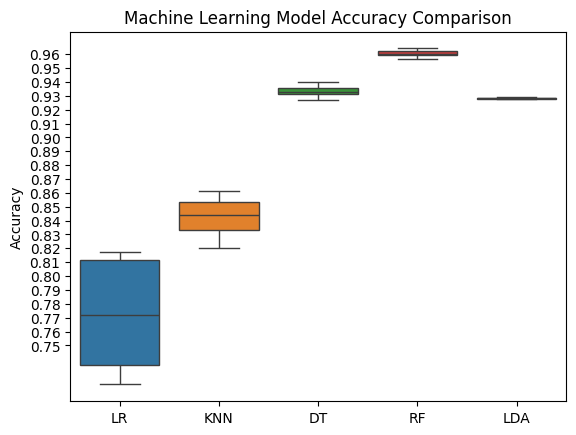

In [ ]:
import numpy as np

# Combine scores into a single list
results = [lr_scores, knn_scores,dt_scores,rf_scores,lda_scores]

# Create labels
names = ['LR','KNN','DT','RF','LDA','SVC']

# Create the boxplot
sb.boxplot(data=results)
plt.xticks(range(len(names)), names)
plt.yticks(np.arange(0.75, 0.97, step=0.01))
plt.title('Machine Learning Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
